## K-Means Clustering

![](https://miro.medium.com/max/1280/1*5UHmgCaTD8EegsPuKcxC1Q.png)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
%matplotlib inline

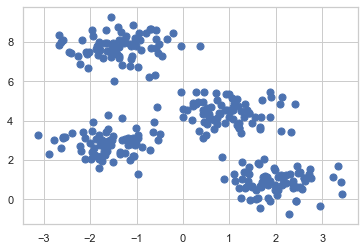

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

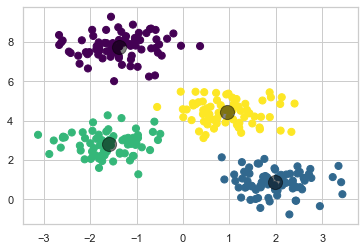

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

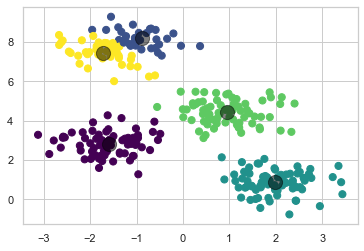

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5) #choose the best number of cluster -> elbow
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [5]:
centers

array([[-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [-1.58438467,  2.83081263],
       [ 0.94973532,  4.41906906]])

![](https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

# Case study 1

In [9]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [10]:
customers = pd.read_csv("customers.csv")

In [11]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
customers['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [13]:
customers['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

In [ ]:
# -> trong truong hop nay ko phai dung den Scaler

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
customers['Gender_le'] = le.fit_transform(customers['Gender'])

In [15]:
customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Gender_le'],
      dtype='object')

In [16]:
feature_cols = ['Age','Annual Income (k$)','Spending Score (1-100)'
               , 'Gender_le']
X = customers[feature_cols]
X.head()
# ko co target variable -> phai di tim target variable

,Age,Annual Income (k$),Spending Score (1-100),Gender_le
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [17]:
# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(X)

In [19]:
print(pca.explained_variance_ratio_)

[0.45118077 0.44091539]


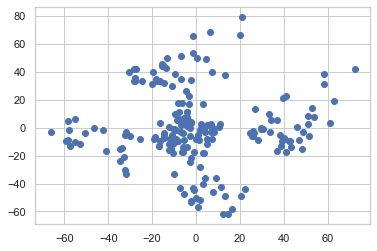

In [20]:
pca_2d = pca.transform(X)
import matplotlib.pyplot as plt
plt.scatter(pca_2d[:,0],pca_2d[:,1])

In [ ]:
# co bao nhieu cluster (phan loai) o day?

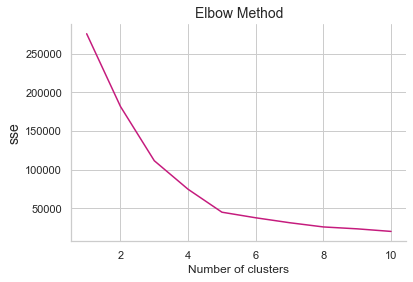

In [21]:
#elbow (canh tay -> chon diem củi trỏ)
sse = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(pca_2d)
    sse.append(km.inertia_)
plt.plot(range(1,11),sse, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('sse', size=14)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0) #chon duoc so luong phan loai = 5 dua vao elbow method

In [24]:
y_means = kmeans.fit_predict(X)
y_means

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [25]:
X[:5]

,Age,Annual Income (k$),Spending Score (1-100),Gender_le
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [26]:
centroids = pd.DataFrame(kmeans.cluster_centers_, 
                        columns = ["Age", "Annual Income", "Spending", "Gender"])

In [27]:
centroids.index_name = "ClusterID"

In [28]:
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)

In [29]:
centroids

,Age,Annual Income,Spending,Gender,ClusterID
0,45.217391,26.304348,20.913043,0.391304,0
1,43.088608,55.291139,49.569620,0.417722,1
2,32.692308,86.538462,82.128205,0.461538,2
3,40.666667,87.750000,17.583333,0.527778,3
4,25.521739,26.304348,78.565217,0.391304,4


In [ ]:
# truong annual income va spending se giup vao viec phan loai

In [30]:
import numpy as np
for i in centroids.columns:
    print("standard deviation of ",i, np.std(centroids[i]))

standard deviation of  Age 7.312885205330477
standard deviation of  Annual Income 27.21715784032707
standard deviation of  Spending 27.36772531877916
standard deviation of  Gender 0.051742184359432446
standard deviation of  ClusterID 1.4142135623730951


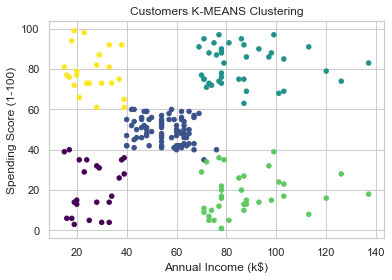

In [31]:
plt.scatter(customers["Annual Income (k$)"], 
            customers["Spending Score (1-100)"], 
            c=y_means, s=20, cmap='viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customers K-MEANS Clustering");

How does k-means clustering works? The main idea is to **select k centers, one for each cluster**. There are several ways to initialize those centers. We can do it randomly, pass certain points that we believe are the center or place them in a smart way (e.g. as far away from each other as possible). Then, we calculate the Euclidean distance between each point and the cluster centers. We assign the points to the cluster center where the distance is minimum. After that, we recalculate the new cluster center. We select the point that is in the middle of each cluster as the new center.  And we start again, calculate distance, assign to cluster, calculate new centers. When do we stop? When the centers do not move anymore.

In [32]:
data_final = customers
data_final['Cluster'] = y_means.tolist()

In [33]:
data_final.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_le,Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,0
